In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("iris.data",
names=['sepal_length','sepal_width','petal_length','petal_width','target'])
df_isna = df.isna()

null_count = [0,0,0,0,0]

col_name = df_isna.columns

for ind in df_isna.index:
    for i in range(5):
        #print(df_isna[ind])
        if df_isna[col_name[i]][ind]:
            null_count[i] += 1

print(null_count)

[2, 0, 2, 3, 3]


In [3]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['target']= label_encoder.fit_transform(df['target'])
 
df['target'].unique()

array([0, 1, 2])

In [5]:
df_wotarget = df.drop('target', axis=1)
col_name_wotarget = df_wotarget.columns

before_status = []
before_status.append((df_wotarget.mean(),df_wotarget.var()))
print("Before Normalization:")
print(before_status)
print("--------------------------")

scaler = preprocessing.StandardScaler()
model = scaler.fit(df_wotarget)
scaled_data = model.transform(df_wotarget)

scaled_data = pd.DataFrame(scaled_data, columns = col_name_wotarget)

after_status = []
after_status.append((scaled_data.mean(),scaled_data.var()))
print("After Normalization:")
print(after_status)


Before Normalization:
[(sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64, sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64)]
--------------------------
After Normalization:
[(sepal_length   -4.736952e-16
sepal_width    -6.631732e-16
petal_length    3.315866e-16
petal_width    -2.842171e-16
dtype: float64, sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
dtype: float64)]


In [6]:
pca = PCA(n_components = 2)
PCA_result = pca.fit_transform(scaled_data)
last_df = pd.DataFrame(data = PCA_result, columns = ['pca_A', 'pca_B'])
last_df = pd.concat([last_df, df['target']], axis = 1)
last_df

,pca_A,pca_B,target
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
...,...,...,...
145,1.870522,0.382822,2
146,1.558492,-0.905314,2
147,1.520845,0.266795,2
148,1.376391,1.016362,2


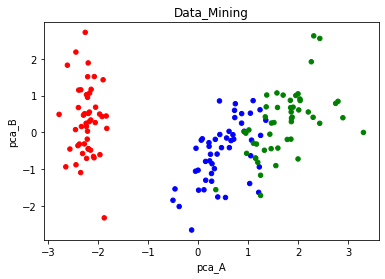

In [7]:
color_list = {
    0: 'blue', 1: 'green', 2: 'red'
}
target  = last_df['target']
color_list = target.map({0: 'red', 1: 'blue', 2: 'green'})
last_df['color_list'] = color_list
last_df.plot.scatter(x = "pca_A", y = "pca_B", c= "color_list")
plt.title('Data_Mining')
plt.show()

<AxesSubplot:>

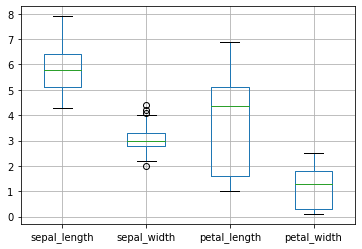

In [8]:
df_wotarget.boxplot()